In [1]:
from __future__ import print_function
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization,Conv2D,MaxPooling2D
import os

C:\Users\Dinesh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Dinesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dinesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dinesh\Anaconda3\lib\site-packages\tensorflow\python\framew

In [2]:
img_rows,img_cols=180,180
batch_size = 16

In [3]:
train_data_dir='dataSet1'
validation_data_dir='dataSet/Preprocess'

In [4]:
train_datagen = ImageDataGenerator(
                rescale=1./255,
                rotation_range=30,
                shear_range=0.3,
                zoom_range=0.3,
                width_shift_range=0.4,
                height_shift_range=0.4,
                horizontal_flip=True,
                fill_mode='nearest'
                )

In [5]:
validation_datagen = ImageDataGenerator(rescale=1./255)

In [6]:
train_generator = train_datagen.flow_from_directory(
                        train_data_dir,
                        color_mode='rgb',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True
                )

Found 6412 images belonging to 11 classes.


In [7]:
validation_generator = validation_datagen.flow_from_directory(
                        validation_data_dir,
                        color_mode='rgb',
                        target_size=(img_rows,img_cols),
                        batch_size=batch_size,
                        class_mode='categorical',
                        shuffle=True
                )

Found 1067 images belonging to 11 classes.


In [8]:
num_classes=train_generator.num_classes

In [9]:
'''model = Sequential()
model.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(256,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(512,(3,3),padding='same',activation='relu'))
model.add(Flatten())
model.add(Dense(4096,activation='relu'))
model.add(Dense(4096,activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='sigmoid'))'''

"model = Sequential()\nmodel.add(Conv2D(64,(3,3),padding='same',activation='relu',input_shape=(img_rows,img_cols,3)))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(128,(3,3),padding='same',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(256,(3,3),padding='same',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(512,(3,3),padding='same',activation='relu'))\nmodel.add(MaxPooling2D(pool_size=(2,2)))\n\nmodel.add(Conv2D(512,(3,3),padding='same',activation='relu'))\nmodel.add(Flatten())\nmodel.add(Dense(4096,activation='relu'))\nmodel.add(Dense(4096,activation='relu'))\nmodel.add(Dense(1024,activation='relu'))\nmodel.add(Dropout(0.5))\nmodel.add(Dense(num_classes,activation='sigmoid'))"

In [10]:
model = Sequential()

#block 1
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,3)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(32,(3,3),padding='same',kernel_initializer='he_normal',input_shape=(img_rows,img_cols,1)))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#block 2
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(64,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#block 3
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(128,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#block 4
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Conv2D(256,(3,3),padding='same',kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#block 5
model.add(Flatten())
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#block 6
model.add(Dense(64,kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

#block 7
model.add(Dense(num_classes,kernel_initializer='he_normal'))
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 180, 180, 32)      896       
_________________________________________________________________
activation_1 (Activation)    (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 180, 180, 32)      128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 180, 180, 32)      9248      
_________________________________________________________________
activation_2 (Activation)    (None, 180, 180, 32)      0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 180, 180, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 90, 90, 32)        0         
__________

In [12]:
from keras.optimizers import RMSprop,SGD,Adam
from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [13]:
checkpoint = ModelCheckpoint(
                 'FaceRecognitionWeights.h5',
                 monitor='val_loss',
                 mode='min',
                 save_best_only=True,
                 verbose=1
            )

earlystop = EarlyStopping(
                  monitor='val_loss',
                  min_delta=0,
                  patience=9,
                  verbose=1,
                  restore_best_weights=True
            )

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                    patience=3, 
                    verbose=1, 
                    factor=0.2, 
                    min_delta=0.0001
            )
callbacks = [earlystop,checkpoint,reduce_lr]

In [14]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc']
              )

nb_train_samples = len(train_generator.filepaths)
nb_validation_samples = len(validation_generator.filepaths)
epochs = 100
batch_size=10
history = model.fit_generator(
            train_generator,
            steps_per_epoch=nb_train_samples//batch_size,
            epochs=epochs,
            callbacks=callbacks,
            validation_data=validation_generator,
            validation_steps=nb_validation_samples//batch_size
        )


Instructions for updating:
Use tf.cast instead.
Epoch 1/100
641/641 [==============================] - 5351s 8s/step - loss: 2.9165 - acc: 0.1191 - val_loss: 2.2421 - val_acc: 0.2051

Epoch 00001: val_loss improved from inf to 2.24209, saving model to face_recognition.h5
Epoch 2/100
641/641 [==============================] - 5201s 8s/step - loss: 2.4107 - acc: 0.1626 - val_loss: 2.1455 - val_acc: 0.2885

Epoch 00002: val_loss improved from 2.24209 to 2.14553, saving model to face_recognition.h5
Epoch 3/100
641/641 [==============================] - 5115s 8s/step - loss: 2.2784 - acc: 0.2004 - val_loss: 2.1093 - val_acc: 0.2742

Epoch 00003: val_loss improved from 2.14553 to 2.10925, saving model to face_recognition.h5
Epoch 4/100
641/641 [==============================] - 5121s 8s/step - loss: 2.2085 - acc: 0.2216 - val_loss: 1.9390 - val_acc: 0.3264

Epoch 00004: val_loss improved from 2.10925 to 1.93898, saving model to face_recognition.h5
Epoch 5/100
641/641 [=======================

In [1]:
from keras.models import load_model
from time import sleep
from keras.preprocessing.image import img_to_array
from keras.preprocessing import image
import cv2
import numpy as np
import face_recognition

C:\Users\Dinesh\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\Dinesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Dinesh\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Dinesh\Anaconda3\lib\site-packages\tensorflow\python\framew

In [2]:
classifier = load_model('Models/face_recognition.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [103]:
img= cv2.imread('Images//sample24.jpg')
class_labels = ['Sowjanya','Chaithu','Suman','Harika','Dinesh','Archana','MPK','Sowmya','Ravi','Yasaswini','Abhi']
font=cv2.FONT_HERSHEY_COMPLEX_SMALL

In [104]:
import matplotlib.pyplot as plt

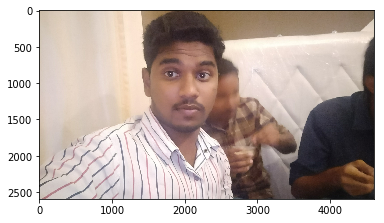

In [105]:
plt.imshow(img[:,:,::-1])

In [106]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
faces = face_recognition.face_locations(gray)
faces

[(617, 2534, 1576, 1575)]

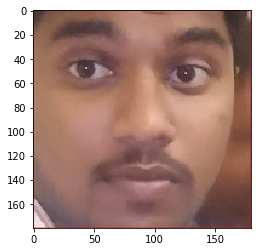

Sowmya


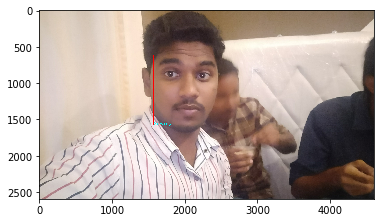

In [107]:
for top, right, bottom, left in faces:
    cv2.rectangle(img, (left, top), (right, bottom), (0, 0, 255), 3)
    roi_gray=img[top:bottom,left:right]
    roi_gray=cv2.resize(roi_gray,(180,180),interpolation=cv2.INTER_AREA)
    plt.imshow(roi_gray[:,:,::-1])
    plt.show()
    if np.sum([roi_gray])!=0:
        roi = roi_gray.astype('float')/255.0
        roi = img_to_array(roi)
        roi = np.expand_dims(roi,axis=0)
        preds = classifier.predict(roi)[0]
        label = class_labels[preds.argmax()]
        label_position=(left,bottom)
        cv2.putText(img,label,label_position,font,3,(255,255,0),3)
        print(label)
    else:
        cv2.putText(img,"No Face Found",label_position,font,1,(255,255,0),3)
        
    
plt.imshow(img[:,:,::-1])
plt.show()